In [1]:
from diffusers import StableDiffusionPipeline
import torch

model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "a photo of future pub"
image = pipe(prompt).images[0]  

d:\anaconda3\envs\genai\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
100%|██████████| 50/50 [00:04<00:00, 10.92it/s]


In [2]:
from huggingface_hub import model_info

# LoRA weights ~3 MB
model_path = "D:/project/dotting_ai/data/dreambooth/spritesheet/pytorch_lora_weights.bin"

info = model_info(model_path)
model_base = info.cardData["base_model"]
print(model_base)   # CompVis/stable-diffusion-v1-4

HFValidationError: Repo id must be in the form 'repo_name' or 'namespace/repo_name': 'D:/project/dotting_ai/data/dreambooth/spritesheet/pytorch_lora_weights.bin'. Use `repo_type` argument if needed.

In [2]:
model_id = "runwayml/stable-diffusion-v1-5"
model_path = "D:/project/dotting_ai/data/lora/spritesheet/checkpoint-1000/pytorch_model.bin"


pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

# load lora weights
pipe.unet.load_attn_procs(model_path, subfolder="checkpoint-2500", weight_name="pytorch_model.bin")

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [16]:
prompt = "Donald trump, walking, man, spritesheet"
image = pipe(prompt).images[0]  

100%|██████████| 50/50 [00:03<00:00, 13.92it/s]


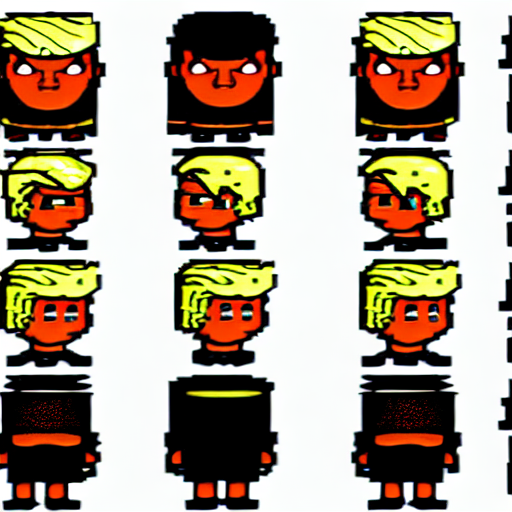

In [17]:
image